# PREPROCESSING: MISSING VALUES

In [145]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Untuk impute missing values
from sklearn.impute import SimpleImputer

In [146]:
df = pd.DataFrame({
    'x1':[4, 5, np.nan, 6, 7, 9],
    'x2':[3, 5, 6, 5, np.nan, 5],
    'x3':[10, 11, 12, 9, 8, 11],
    'x4':['A', 'A', 'C', 'C', 'D', np.nan],
    'x5':['X', 'Y', 'X', 'X', np.nan, 'Y'],
    'x6':['M', 'M', np.nan, 'M', 'N', np.nan]
})

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [147]:
df.describe()

,x1,x2,x3
count,5.000000,5.000000,6.000000
mean,6.200000,4.800000,10.166667
std,1.923538,1.095445,1.471960
min,4.000000,3.000000,8.000000
25%,5.000000,5.000000,9.250000
50%,6.000000,5.000000,10.500000
75%,7.000000,5.000000,11.000000
max,9.000000,6.000000,12.000000


## Simple Imputer

- SimpleImputer bersifat univariate. Mengisi missing values hanya berdasarkan 1 kolom (kolom di mana missing value yg mau diisi tsb berada)
- SimpleImputer bisa untuk mengisi missing values dengan: mean, median, mode (most_frequent), constant.

**Numerical Variable**

- mean
- median
- constant

In [148]:
# define imputer
imp_mean = SimpleImputer(strategy='mean')
# imp_mean = SimpleImputer(strategy='median')


# tentukan kolom mana yang ingin diimpute dengan mean
df[['x1','x2','x3']] = imp_mean.fit_transform(df[['x1','x2','x3']])

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


**Categorical Variable**

- most_frequent (mode)
- constant

In [149]:
# define imputer
imp_mode = SimpleImputer(strategy='most_frequent')

# tentukan kolom mana saja yang mau diimpute dengan mode
df[['x4','x5']] = imp_mode.fit_transform(df[['x4','x5']])

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


In [150]:
# define imputer (constant)
imp_constant = SimpleImputer(strategy='constant', fill_value='P')

# tentukan kolom mana saja yang mau diimpute dengan constant
df[['x6']] = imp_constant.fit_transform(df[['x6']])

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,P
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,P


## Iterative Imputer

- Iterative Imputer bersifat multivariate. Mengisi missing value berdasarkan 1 kolom atau lebih (berdasarkan kolom lain)
- Cara kerjanya menggunakan regresi. 
- Misalnya ada 3 kolom: 'tahun_kerja', 'usia', 'penghasilan'
- Jika padda suatu baris di kolom 'penghasilan' ada yang missing, maka IterativeImputer akan menjadikan kolom 'penghasilan' sebagai target, dan kolom 'tahun_kerja' dan 'usia' sebagai feature.
- Hanya berlaku untuk kolom numerikal

In [151]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [152]:
df = pd.DataFrame({
    'x1':[4, 5, np.nan, 6, 7, 9],
    'x2':[3, 5, 6, 5, np.nan, 5],
    'x3':[10, 11, 12, 9, 8, 11],
    'x4':['A', 'A', 'C', 'C', 'D', np.nan],
    'x5':['X', 'Y', 'X', 'X', np.nan, 'Y'],
    'x6':['M', 'M', np.nan, 'M', 'N', np.nan]
})

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [153]:
# define imputer
imp_iter = IterativeImputer(max_iter=10, random_state=0)

# pilih kolom
df[['x1','x2','x3']] = imp_iter.fit_transform(df[['x1','x2','x3']])

df

,x1,x2,x3,x4,x5,x6
0,4.000000,3.000000,10.0,A,X,M
1,5.000000,5.000000,11.0,A,Y,M
2,6.202755,6.000000,12.0,C,X,NaN
3,6.000000,5.000000,9.0,C,X,M
4,7.000000,4.705522,8.0,D,NaN,N
5,9.000000,5.000000,11.0,NaN,Y,NaN


## KNN Imputer

- KNN Imputer bersifat multivariate.
- Cara kerjanya dengan mencari data point terdekat dengan data point yang ada missing value-nya
- Jika padda suatu baris di kolom 'penghasilan' ada yang missing, maka IterativeImputer akan menjadikan kolom 'penghasilan' sebagai target, dan kolom 'tahun_kerja' dan 'usia' sebagai feature.
- Hanya berlaku untuk kolom numerikal

In [154]:
from sklearn.impute import KNNImputer

In [155]:
df = pd.DataFrame({
    'x1':[4, 5, np.nan, 6, 7, 9],
    'x2':[3, 5, 6, 5, np.nan, 5],
    'x3':[10, 11, 12, 9, 8, 11],
    'x4':['A', 'A', 'C', 'C', 'D', np.nan],
    'x5':['X', 'Y', 'X', 'X', np.nan, 'Y'],
    'x6':['M', 'M', np.nan, 'M', 'N', np.nan]
})

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [156]:
# define imputer
imp_knn = KNNImputer(n_neighbors=5)

# pilih kolom
df[['x1','x2','x3']] = imp_knn.fit_transform(df[['x1','x2','x3']])

df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


In [157]:
df = pd.read_csv('titanic.csv')
df

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


In [158]:
# persentase missing value dalam suatu kolom
df.isna().sum() / 891 *100

sex             0.000000
age            19.865320
parch           0.000000
fare            0.000000
class           0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [159]:
# drop kolom 'deck' karena terlalu banyak Missing values
df.drop(columns='deck', inplace=True)

In [160]:
df.isna().sum() / 891 *100

sex             0.000000
age            19.865320
parch           0.000000
fare            0.000000
class           0.000000
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [161]:
# define x dan y
X = df.drop(columns='alive')
y = df['alive']

In [162]:
from sklearn.model_selection import train_test_split 

# Scaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size=0.2)

In [164]:
X.head(3)

,sex,age,parch,fare,class,embark_town,alone
0,male,22.0,0,7.2500,Third,Southampton,False
1,female,38.0,0,71.2833,First,Cherbourg,False
2,female,26.0,0,7.9250,Third,Southampton,True


In [165]:
# # Column Transformer
# transformer = ColumnTransformer([
#     ('imp_mode', SimpleImputer(strategy='most_frequent'), ['embark_town']),
#     ('imp_median', SimpleImputer(strategy='median'), ['age']),
#     ('onehot', OneHotEncoder(), ['sex','class','embark_town'])
# ])

In [166]:
from sklearn.pipeline import Pipeline

In [167]:
# pipeline untuk kolom 'embark town'
embark_pipe = Pipeline([
    ('imp_mode', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

# Column Transformer
transformer = ColumnTransformer([
    ('embark_pipe', embark_pipe, ['embark_town']),
    ('imp_median', SimpleImputer(strategy='median'), ['age']),
    ('onehot', OneHotEncoder(), ['sex','class'])
])

In [168]:
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

In [169]:
pd.DataFrame(X_train_prep)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,28.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,28.0,0.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,28.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,51.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,21.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
707,0.0,0.0,1.0,20.0,0.0,1.0,0.0,0.0,1.0
708,0.0,0.0,1.0,28.0,0.0,1.0,0.0,0.0,1.0
709,0.0,0.0,1.0,39.0,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,28.0,0.0,1.0,0.0,0.0,1.0


# PREPROCESSING: OUTLIERS

In [170]:
df = pd.read_csv('titanic.csv')
df

,sex,age,parch,fare,class,deck,embark_town,alive,alone
0,male,22.0,0,7.2500,Third,NaN,Southampton,no,False
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
2,female,26.0,0,7.9250,Third,NaN,Southampton,yes,True
3,female,35.0,0,53.1000,First,C,Southampton,yes,False
4,male,35.0,0,8.0500,Third,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,13.0000,Second,NaN,Southampton,no,True
887,female,19.0,0,30.0000,First,B,Southampton,yes,True
888,female,NaN,2,23.4500,Third,NaN,Southampton,no,False
889,male,26.0,0,30.0000,First,C,Cherbourg,yes,True


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   parch        891 non-null    int64  
 3   fare         891 non-null    float64
 4   class        891 non-null    object 
 5   deck         203 non-null    object 
 6   embark_town  889 non-null    object 
 7   alive        891 non-null    object 
 8   alone        891 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 56.7+ KB


In [172]:
df.describe()

,age,parch,fare
count,714.000000,891.000000,891.000000
mean,29.699118,0.381594,32.204208
std,14.526497,0.806057,49.693429
min,0.420000,0.000000,0.000000
25%,20.125000,0.000000,7.910400
50%,28.000000,0.000000,14.454200
75%,38.000000,0.000000,31.000000
max,80.000000,6.000000,512.329200


### Global Outlier (dengan Univariate Analysis)

- IQR
- Boxplot

In [173]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

In [174]:
outliers(df['parch'])

Upper fence:  0.0
Lower fence:  0.0


<AxesSubplot:xlabel='parch'>

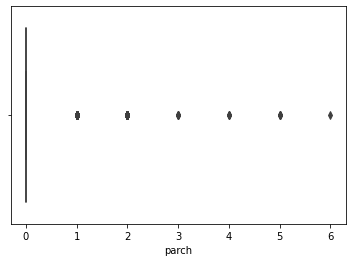

In [175]:
sns.boxplot(data=df, x='parch')

In [176]:
outliers(df['fare'])

Upper fence:  65.6344
Lower fence:  -26.724


<AxesSubplot:xlabel='fare'>

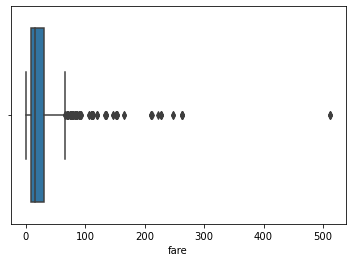

In [177]:
sns.boxplot(data=df, x='fare')

In [178]:
# menampilkan data point yg termasuk outliers

df[df['fare'] > 65.6344]

,sex,age,parch,fare,class,deck,embark_town,alive,alone
1,female,38.0,0,71.2833,First,C,Cherbourg,yes,False
27,male,19.0,2,263.0000,First,C,Southampton,no,False
31,female,NaN,0,146.5208,First,B,Cherbourg,yes,False
34,male,28.0,0,82.1708,First,NaN,Cherbourg,no,False
52,female,49.0,0,76.7292,First,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...
846,male,NaN,2,69.5500,Third,NaN,Southampton,no,False
849,female,NaN,0,89.1042,First,C,Cherbourg,yes,False
856,female,45.0,1,164.8667,First,NaN,Southampton,yes,False
863,female,NaN,2,69.5500,Third,NaN,Southampton,no,False


### Contextual Outlier

<AxesSubplot:xlabel='embark_town', ylabel='fare'>

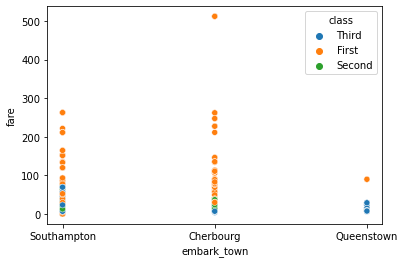

In [179]:
sns.scatterplot(data=df, x='embark_town', y='fare', hue='class')

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='fare'>

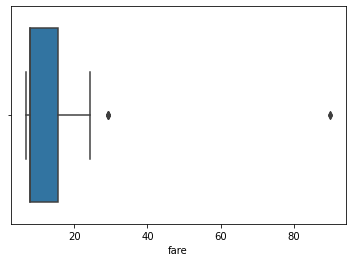

In [180]:
sns.boxplot(df[df['embark_town']=='Queenstown']['fare'])

In [181]:
outliers(df[df['embark_town']=='Queenstown']['fare'])

Upper fence:  27.125
Lower fence:  -3.875


In [182]:
df[(df['embark_town']=='Queenstown') & (df['fare']>27.125)]

,sex,age,parch,fare,class,deck,embark_town,alive,alone
16,male,2.0,1,29.125,Third,NaN,Queenstown,no,False
171,male,4.0,1,29.125,Third,NaN,Queenstown,no,False
245,male,44.0,0,90.000,First,C,Queenstown,no,False
278,male,7.0,1,29.125,Third,NaN,Queenstown,no,False
412,female,33.0,0,90.000,First,C,Queenstown,yes,False
787,male,8.0,1,29.125,Third,NaN,Queenstown,no,False
885,female,39.0,5,29.125,Third,NaN,Queenstown,no,False


- Bagi orang Queenstown, harga tiket Titanic di atas 27.12 dollar sudah dianggap outlier (ini secara konteks di mana seseorang membeli tiket).
- Tapi secara keseluruhan (global), tiket dengan harga 90 dollar masih wajar

## Contoh Outlier

In [183]:
# Membuat dataset buatan/dummy

x = list(np.random.uniform(155, 175, 100))
x = [round(i,2) for i in x]

y = [2 + 0.35*i + np.asscalar((np.random.normal(0,1.5,1))) for i in x]
y

df_assos = pd.DataFrame({
    'x':x,
    'y':y
})

df_assos

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  


,x,y
0,155.23,53.577625
1,166.79,60.327316
2,171.28,59.363342
3,156.74,58.163450
4,164.48,57.584326
...,...,...
95,155.71,57.264430
96,166.54,62.137387
97,167.88,59.373716
98,164.04,60.665145


<AxesSubplot:xlabel='x', ylabel='y'>

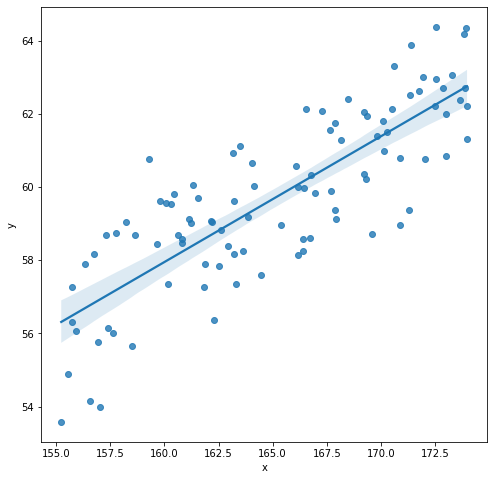

In [184]:
plt.figure(figsize=(8,8))
sns.regplot(data=df_assos, x='x', y='y')

In [185]:
# meanmbahkan 2 titik outliers (contextual outlier)

x = [155, 157]
y = [66, 67]

# y_real = [2 + 0.35*i for i in x]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    # 'y_real':y_real
})

df_assos.append(df_add).reset_index(drop=True)



,x,y
0,155.23,53.577625
1,166.79,60.327316
2,171.28,59.363342
3,156.74,58.163450
4,164.48,57.584326
...,...,...
97,167.88,59.373716
98,164.04,60.665145
99,173.96,62.215447
100,155.00,66.000000


<AxesSubplot:xlabel='x', ylabel='y'>

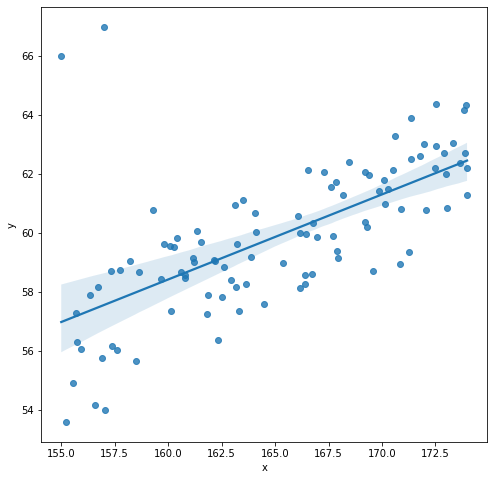

In [186]:
plt.figure(figsize=(8,8))
sns.regplot(data=df_assos.append(df_add).reset_index(drop=True), x='x', y='y')

In [187]:
df_assos

,x,y
0,155.23,53.577625
1,166.79,60.327316
2,171.28,59.363342
3,156.74,58.163450
4,164.48,57.584326
...,...,...
95,155.71,57.264430
96,166.54,62.137387
97,167.88,59.373716
98,164.04,60.665145


In [188]:
# menambahkan 4 titik outliers (merusak pola garis regresi)

x = [170, 171, 173, 180]
y = [91, 95, 95, 100]


df_break = pd.DataFrame({
    'x':x,
    'y':y
})

df_assos.append(df_break).reset_index(drop=True)

,x,y
0,155.23,53.577625
1,166.79,60.327316
2,171.28,59.363342
3,156.74,58.163450
4,164.48,57.584326
...,...,...
99,173.96,62.215447
100,170.00,91.000000
101,171.00,95.000000
102,173.00,95.000000


<AxesSubplot:xlabel='x', ylabel='y'>

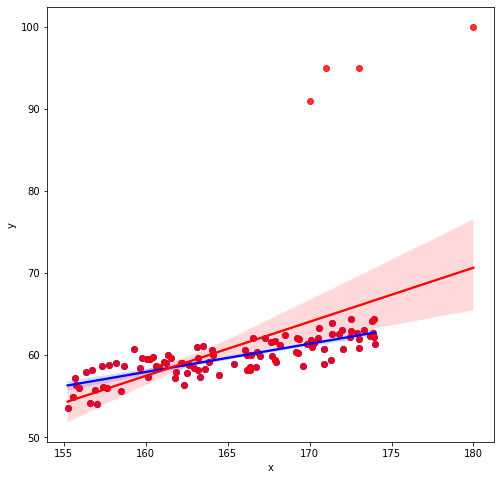

In [189]:
plt.figure(figsize=(8,8))

# dataset tanpa outlier
sns.regplot(data=df_assos, x='x', y='y', color='b')

# dataset dengan tambahan 4 data point outliers (merusak pola regresi)
sns.regplot(data=df_assos.append(df_break).reset_index(drop=True), x='x', y='y', color='r')

<AxesSubplot:xlabel='x', ylabel='y'>

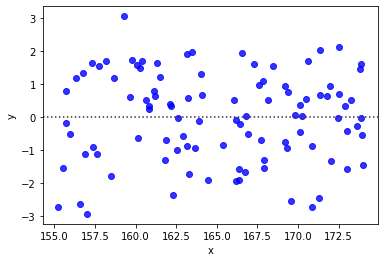

In [190]:
# dataset tanpa outlier
sns.residplot(data=df_assos, x='x', y='y', color='b')

<AxesSubplot:xlabel='x', ylabel='y'>

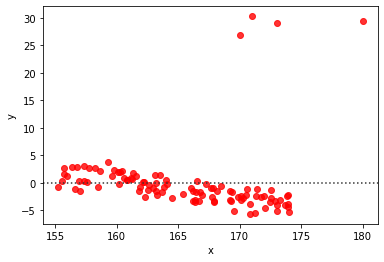

In [191]:
# dataset dengan tambahan 4 data point outliers (merusak pola regresi)
sns.residplot(data=df_assos.append(df_break).reset_index(drop=True), x='x', y='y', color='r')

# Exercise: Missing Values & Outliers

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Imputing missing value
- Handling outliers
- Encoding
- Scaling
- Regularization
<br><br>

### **Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

### **Yang dilakukan pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Hapus outliers jika ada.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk imputasi missing value dan encoding.
    - Ada 4 features yang mengandung missing value. Isi missing value tersebut dengan imputer yang menurut kamu paling sesuai dengan karakter masing-masing feature.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan prediksi dengan metode Lasso pada data preprocessed.


In [192]:
df = pd.read_csv('melb_data.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [198]:
df= df[['Suburb','Rooms','Type','Method','Distance','Bedroom2','Bathroom','Car','Landsize',
            'BuildingArea','YearBuilt','CouncilArea','Regionname','Price']]

In [199]:
for i in list(df.describe()):
    print(i)
    outliers(df[i])
    

Rooms
Upper fence:  4.5
Lower fence:  0.5
Distance
Upper fence:  23.35
Lower fence:  -4.250000000000002
Bedroom2
Upper fence:  4.5
Lower fence:  0.5
Bathroom
Upper fence:  3.5
Lower fence:  -0.5
Car
Upper fence:  3.5
Lower fence:  -0.5
Landsize
Upper fence:  1362.0
Lower fence:  -534.0
BuildingArea
Upper fence:  295.5
Lower fence:  -28.5
YearBuilt
Upper fence:  2087.5
Lower fence:  1851.5
Price
Upper fence:  2350000.0
Lower fence:  -370000.0


In [200]:
df.describe()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Price
count,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,1.358000e+04
mean,2.937997,10.137776,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,1.075684e+06
std,0.955748,5.868725,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,6.393107e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,8.500000e+04
25%,2.000000,6.100000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,6.500000e+05
50%,3.000000,9.200000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,9.030000e+05
75%,3.000000,13.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,1.330000e+06
max,10.000000,48.100000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,9.000000e+06
